<a href="https://colab.research.google.com/github/Shubhangani-Tiwari/Supervised-M.L-Project--Transport-Demand-Prediction/blob/main/Demand_prdiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name - Transport Demand Prediction**

 **Project Type - Regression**

**Contribution - Individual**

## **Project Summary-**

## **GitHub Link -**

## **Problem Statement**

This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.

The towns from which these routes originate are:

1.Awendo

2.Homa Bay

3.Kehancha

4.Kendu Bay

5.Keroka

6.Keumbu

7.Kijauri

8.Kisii

9.Mbita

10.Migori

11.Ndhiwa

12.Nyachenge

13.Oyugis

14.Rodi

15.Rongo

16.Sirare

17.Sori

The routes from these 17 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

The three stops that all these routes make in Nairobi (in order) are:

1.Kawangware: the first stop in the outskirts of Nairobi

2.Westlands

3.Afya Centre: the main bus terminal where most passengers disembark

All of these points are mapped here.
Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.


## **Define Your Business Objective?**

# **Data Description**

Nairobi Transport Data.csv (zipped) is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.

Uber Movement traffic data can be accessed here. Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

# **Variables Description**

ride_id: unique ID of a vehicle on a specific route on a specific day and time.

seat_number: seat assigned to ticket

payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)

payment_receipt: unique id number for ticket purchased from Mobiticket

travel_date: date of ride departure. (MM/DD/YYYY)

travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)

travel_from: town from which ride originated

travel_to: destination of ride. All rides are to Nairobi.

car_type: vehicle type (shuttle or bus)


max_capacity: number of seats on the vehicle




In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pd.options.display.max_columns = 100

In [5]:
#Read the dataset
df=pd.read_csv('/content/drive/MyDrive/Nairobi Transport Data.zip')
df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49


In [6]:
#first 5 values
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [7]:
#last 5 values
df.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


# **Understanding the data**

In [8]:
#Shape
df.shape

(51645, 10)

In [9]:
#information about null values and datatype for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [10]:
#information about null values
df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In [11]:
#change datatype of ride_id and max_capacity from int to object because it is also a nominal categorial data and we want their categorical description.
df[["ride_id","max_capacity"]]=df[["ride_id","max_capacity"]].astype(str)
     

In [12]:
#categorical description
df.describe(include='object')


,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
count,51645,51645,51645,51645,51645,51645,51645,51645,51645,51645
unique,6249,61,2,51645,149,78,17,1,2,2
top,8454,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus,49
freq,50,2065,51532,1,856,3926,22607,51645,31985,31985


# **Summary:-**

In Ride_id, there are 6249 unique values.

There are total 61 unique seat numbers in this dataset.

Travelers have used 2 types of payment methods and most of the people(i.e. 51532 out of 51645) have used Mpesa to pay for their ticket.

The record of 149 days is present in this dataset.

In travel_time, there are 78 unique time.

There are 17 towns where rides are originated and 22607 rides are only originated from Kisii.

There are 2 type of cars and most of them(31985 out of 51645) are bus.

There are 2 Maximum seat capacity and most of them have 49 seat capacity and frequency of 49 seat capacity is equal to frequency of bus, Thus we say that Bus have 49 seat capacity.

In [13]:
#get all the column names of the dataset
columns=df.columns
columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [14]:
df['travel_from'].unique()

array(['Migori', 'Keroka', 'Homa Bay', 'Kisii', 'Keumbu', 'Rongo',
       'Kijauri', 'Oyugis', 'Awendo', 'Sirare', 'Nyachenge', 'Kehancha',
       'Kendu Bay', 'Sori', 'Rodi', 'Mbita', 'Ndhiwa'], dtype=object)

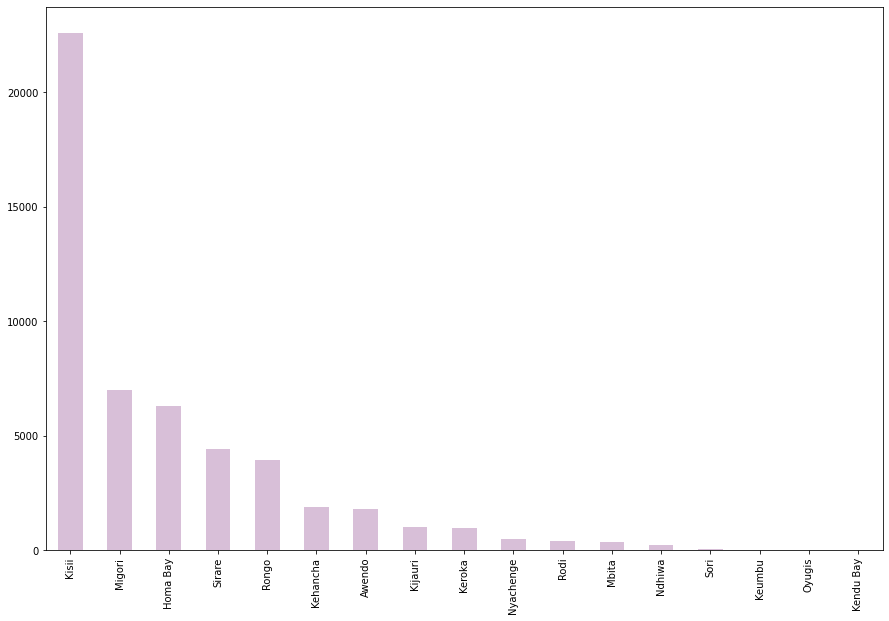

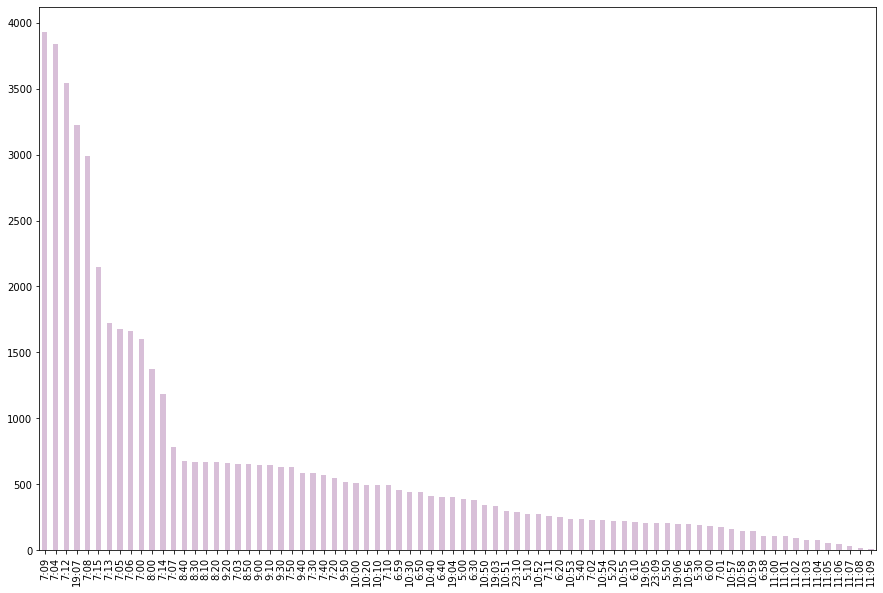

In [15]:
bar_plot_columns = ['travel_from','travel_time']
for column in bar_plot_columns:
  df[column].value_counts().plot(kind='bar',figsize=(15,10),color='thistle')
  plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


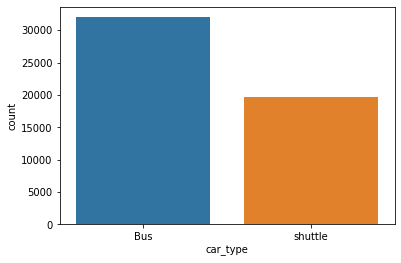

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


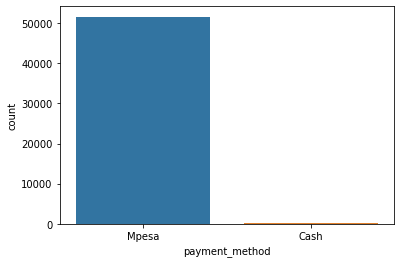

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


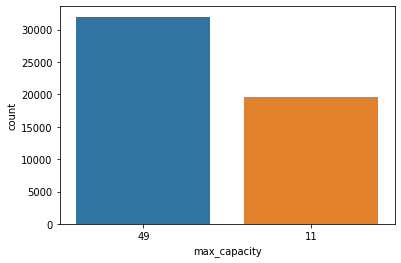

In [16]:
plot_count_cols = ['car_type','payment_method','max_capacity']
for plots in plot_count_cols:
  sns.countplot(df[plots])
  plt.show()


# **Observations:**

We have two types of payment Method Mpesa and cash, people rarely pay Cash.

We have two types of car 'Bus and Shuttle' which has maximum capacity of 49 and 11.

In [17]:
#finding the relation between car_type and max_capacity
df.groupby(['car_type','max_capacity'])['max_capacity'].count().unstack()

max_capacity,11,49
car_type,,
Bus,NaN,31985.0
shuttle,19660.0,NaN


We conclude that bus has seat capacity of 49 and shuttle has seat capacity of 11.

In [18]:
#finding the relation between car_type and travel_from
df.groupby(['travel_from','car_type'])['car_type'].count().unstack()

car_type,Bus,shuttle
travel_from,,
Awendo,1788.0,NaN
Homa Bay,6304.0,NaN
Kehancha,1909.0,NaN
Kendu Bay,1.0,NaN
Keroka,341.0,647.0
Keumbu,3.0,19.0
Kijauri,408.0,623.0
Kisii,4236.0,18371.0
Mbita,378.0,NaN


as we see that, Shuttle only used for travel from Keroka, Keumbu, Kijauri and Kisii town, whereas bus is used for travel from all the town.

In [19]:
df['ride_id'].value_counts()

8454     50
13211    49
10834    49
8090     49
11382    49
         ..
10090     1
10091     1
10114     1
10116     1
14304     1
Name: ride_id, Length: 6249, dtype: int64

## **Finding Our Target Variable**

Since there are total 61645 rows i.e 61645 bookings but only 6249 unique ride_id. This implies that there are more than one seats have booked by single ride_id.

So in order to find the total seat_booking we need to count the different seat numbers corresponding to  single ride_id.

In [20]:
df.groupby(['ride_id']).seat_number.count()

ride_id
10002    1
10003    7
10004    1
10005    1
10006    9
        ..
9988     3
9989     3
9990     1
9997     1
9999     1
Name: seat_number, Length: 6249, dtype: int64

In [21]:
totl_tickit=df.groupby(['ride_id']).seat_number.count().sort_values(ascending=False).rename("number_of_tickit").reset_index()
totl_tickit.head()

,ride_id,number_of_tickit
0,8454,50
1,10834,49
2,8090,49
3,11382,49
4,13211,49


As we have found our target variable therefore let's delete the duplicate values from ride_id.

In [22]:
#Drop duplicates
df=df.drop_duplicates('ride_id')

In [23]:
#shape of new dataset after dropping duplicates
df.shape

(6249, 10)

In [24]:
#merge target variable and independent variable on the basis of ride_id
df =df.merge(totl_tickit,on= 'ride_id')
df.head(10)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickit
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31
5,5781,22A,Mpesa,VGG7Q3MVJX,27-11-17,7:09,Homa Bay,Nairobi,Bus,49,26
6,5784,1X,Mpesa,3OPU23FHRB,20-04-18,5:10,Kisii,Nairobi,shuttle,11,1
7,5789,1X,Mpesa,BPRX4UMFFN,20-04-18,9:50,Kisii,Nairobi,shuttle,11,1
8,5790,1B,Mpesa,DC8ABRSXXK,20-04-18,7:06,Kisii,Nairobi,Bus,49,2
9,5791,1,Mpesa,HGQURN0SZS,20-04-18,6:00,Kisii,Nairobi,shuttle,11,1


In [25]:
#remove ineffectual and constant columns
df.drop(['seat_number','payment_receipt','payment_method','travel_to'],axis=1,inplace= True)

#travel_to is a constant feature since it takes only one value i.e Nairobi

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
x= df.drop(['number_of_tickit'],axis=1)
y = df['number_of_tickit']

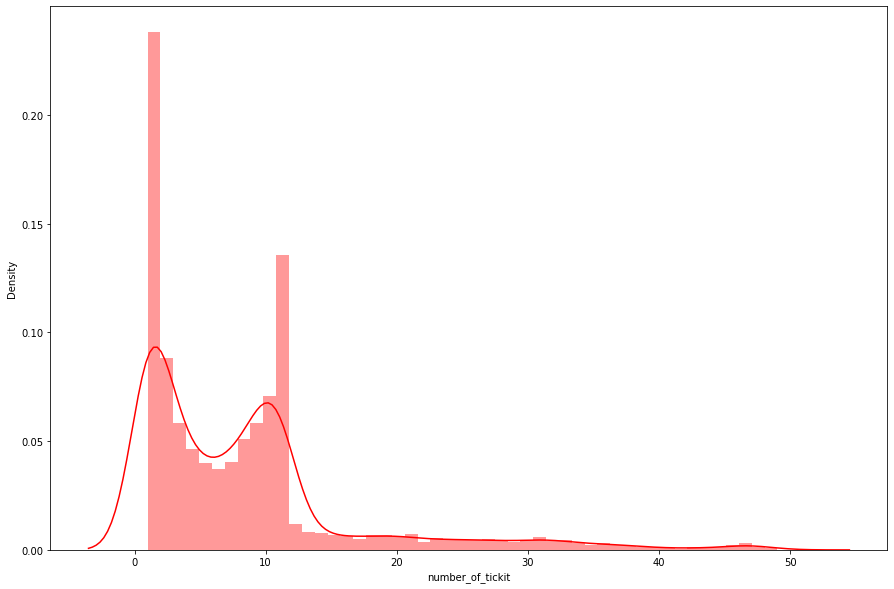

In [28]:
#Let's check the distribution of dependent variable (number_of_tickit)
plt.figure(figsize=(15,10))
sns.distplot(df['number_of_tickit'],color='r')

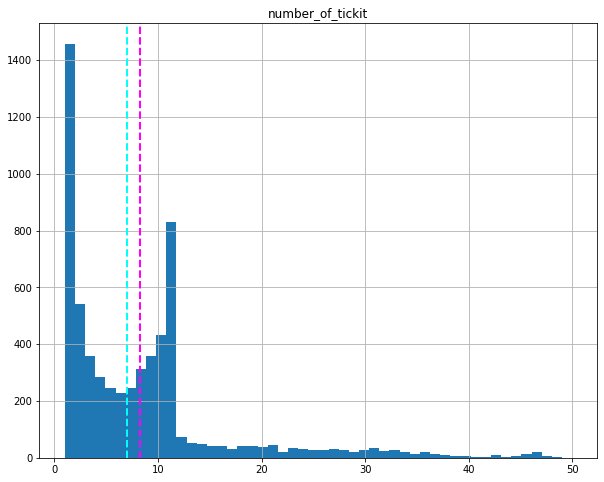

In [29]:
#histogram for target variable
fig=plt.figure(figsize=(10,8))
ax= fig.gca()
df['number_of_tickit'].hist(bins=50,ax=ax)
ax.axvline(df['number_of_tickit'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['number_of_tickit'].median(), color='cyan', linestyle='dashed', linewidth=2)    
ax.set_title('number_of_tickit')
plt.show()
     

Summary:
As we know that, positive skewed, negative skewed and no skewed in the data is determined by mean, median amd mode.

if mean > median > mode then, distribution of the data is positively skewed,

if mean = median = mode then, no skewed that is normally distributed,

otherwise, it is negatively skewed.

Since here mean>median hence we say that num_of_tickit is positively distributed.

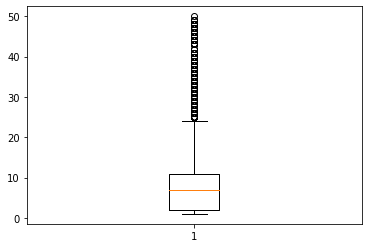

In [30]:
#Boxplot for get an idea about the outliers in our target variable.
plt.boxplot(df['number_of_tickit'])
plt.show()

In [31]:
# creating dataframe to analyse Routes.
routes_tickets = df.groupby(['travel_from'])['number_of_tickit'].sum().reset_index()
routes_tickets

,travel_from,number_of_tickit
0,Awendo,1788
1,Homa Bay,6304
2,Kehancha,1909
3,Kendu Bay,1
4,Keroka,988
5,Keumbu,22
6,Kijauri,1031
7,Kisii,22607
8,Mbita,378
9,Migori,7027


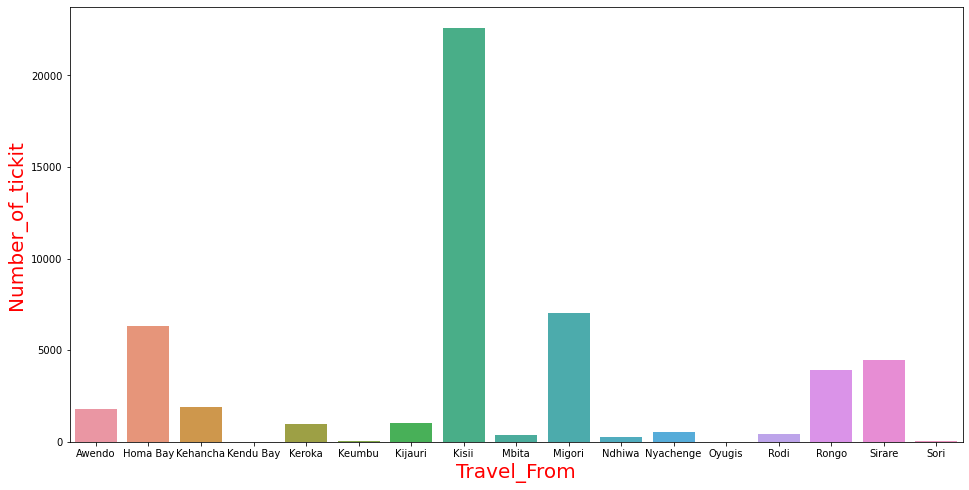

In [32]:
#plt.figure(figsize=(18,15))
#sns.scatterplot(x = df['travel_from'],y=df['number_of_tickit'])
plt.figure(figsize=(16,8))
sp=sns.barplot(x='travel_from',y='number_of_tickit',data=routes_tickets)
plt.xlabel('Travel_From',color='r',fontsize=20)
plt.ylabel('Number_of_tickit',color='r',fontsize=20)
plt.show()

In the above plot we can see the Total number of ticket sold for each Routes.

we can see that Kisii has most number of tickets sold.

# **Feature Engineering**

In [33]:
##combine travel date and travel time column and make a new feature called date.
df["date"]=df["travel_date"]+ " "+df["travel_time"]
df["date"]

0        17-10-17 7:15
1        19-11-17 7:12
2        26-11-17 7:05
3        27-11-17 7:10
4        27-11-17 7:12
             ...      
6244    20-04-18 23:10
6245     20-04-18 7:05
6246     20-04-18 7:09
6247     20-04-18 8:00
6248     14-11-17 5:10
Name: date, Length: 6249, dtype: object

In [34]:
#define a function based on time features
def  time_features(df1): 

  '''This function takes dataframe as an argument and extracts the
  different features from the date variable of the dataset and finaly returns the updated 
  dataset'''
  
  df1["date"]=pd.to_datetime(df1["date"])
  df1["day_of_week"]=df1["date"].dt.dayofweek
  df1["day_of_year"]=df1["date"].dt.dayofyear
  df1["day_of_month"]=df1["date"].dt.day
  df1["year_woy"]=df1["date"].dt.year.astype(str)+df1["date"].dt.weekofyear.astype(str)
  df1["hour"]=df1["date"].dt.hour
  df1["minute"]=df1["date"].dt.minute
  df1["is_weekend"]=df1["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
  df1["year"]=df1["date"].dt.year
  df1["quarter"]=df1["date"].dt.quarter
  df1["month"]=df1["date"].dt.month
  return df1

In [35]:
#call the function
df_new = time_features(df)
df_new.shape

(6249, 18)

In [36]:
#new dataframw with addition of time features
df_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickit,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month
0,1442,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10
1,5437,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11
2,5710,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11
4,5778,27-11-17,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11


In [37]:
#for particular car type
df_bus=df_new[df_new["car_type"]=="Bus"]
df_shuttle=df_new[df_new["car_type"]=="shuttle"]
     

In [38]:
#tuple
dfs=(df_bus,df_shuttle)
     

In [39]:
#car_type value
df_new["car_type"].unique()

array(['Bus', 'shuttle'], dtype=object)

# **Univariate Analysis**

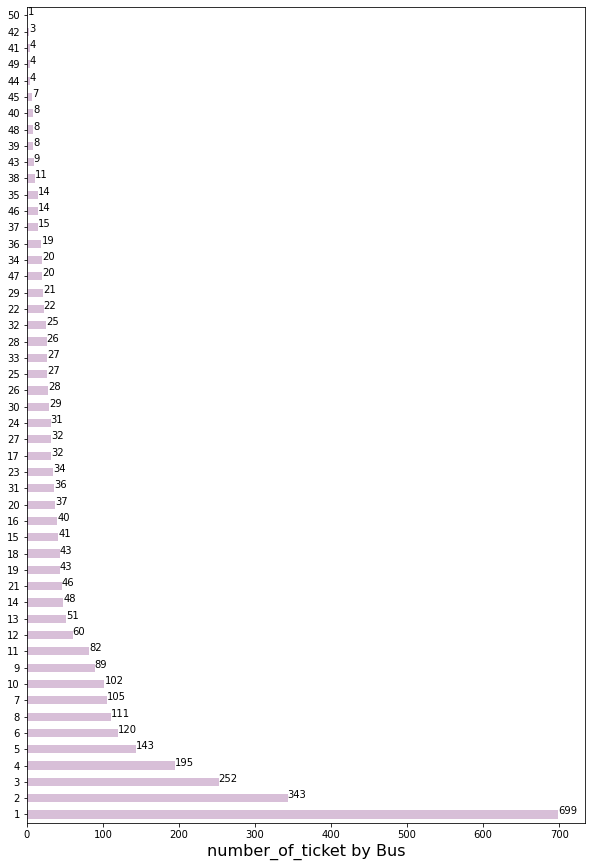

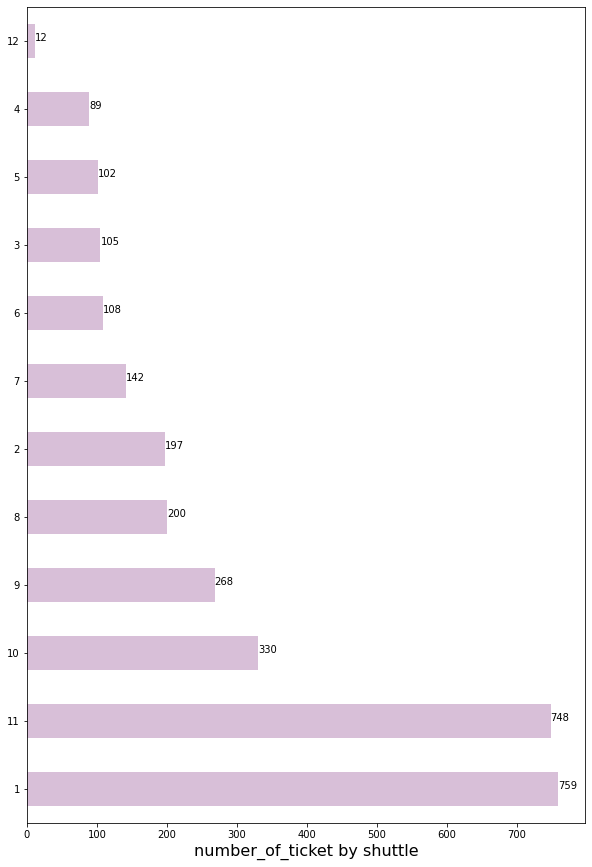

In [40]:
#countplot for both number of ticket when travel is done by bus and by shuttle
for d,car in zip(dfs,df_new["car_type"].unique()):
  y=d["number_of_tickit"].value_counts().reset_index()["number_of_tickit"]
  #barplot 
  plt.figure(figsize=(10,10))
  d["number_of_tickit"].value_counts().plot(kind='barh',color="thistle",figsize=(10,15))
  for index, value in enumerate(y):
    plt.text(value, index, str(value))
  plt.xlabel("number_of_ticket by " + car, fontsize=16)
  plt.show()

## **Summary:**

By Bus, Number of ticket 1 is most frequent with value 699.

By shuttle, Number of ticket 1 and 11 are most frequent with values 759 and 748 respectively.

In [41]:
#let's check for a particular number of ticket 50 which has frequency 1 i.e., 50 people are travel from the particular vehicle on a specific route on a specific day and time.
df_new[df_new["number_of_tickit"]==50]
     

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickit,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month
1924,8454,09-01-18,7:00,Sirare,Bus,49,50,2018-09-01 07:00:00,5,244,1,201835,7,0,1,2018,3,9


Highest number of tickets is 50, in bus to travel from Sirare to Nairobi at 7:00 A.M. on 09-01-18 .

In [42]:
len(df_new[(df_new["number_of_tickit"]>10) & (df_new["car_type"]=="shuttle")])/len(df_new[df_new["car_type"]=="shuttle"])
     

0.24836601307189543

We conclude that 25% of shuttles were utilize their full capacity(i.e 11 seats)

year


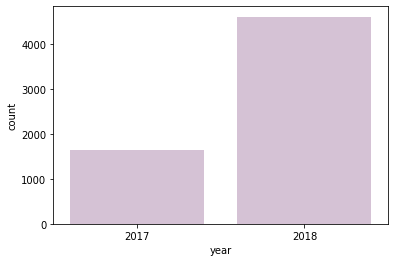

month


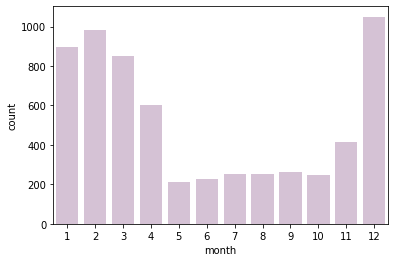

quarter


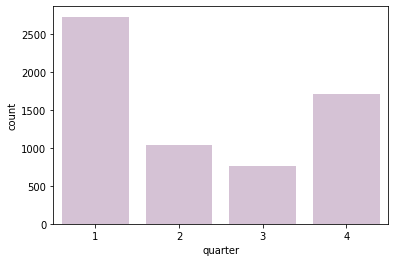

In [43]:
#countplot for year,month and quarters.
count_clms=["year","month","quarter"]
for feature in count_clms:
   print(feature)
   sns.countplot(df_new[feature],color='thistle')
   plt.show()
 


# **Summary**

From all of these plot, as we saw that:

This dataset contains data of 2 year (i.e. 2017 and 2018).

we conclude that maximum vehicles are used in quarter 1.

we conclude that maximum vehicles are used in month 12, 2 and 1(means in summer season of nairobi).

# **BIVARIATE ANALYSIS**


In [44]:
categorical_features=['travel_from','car_type']

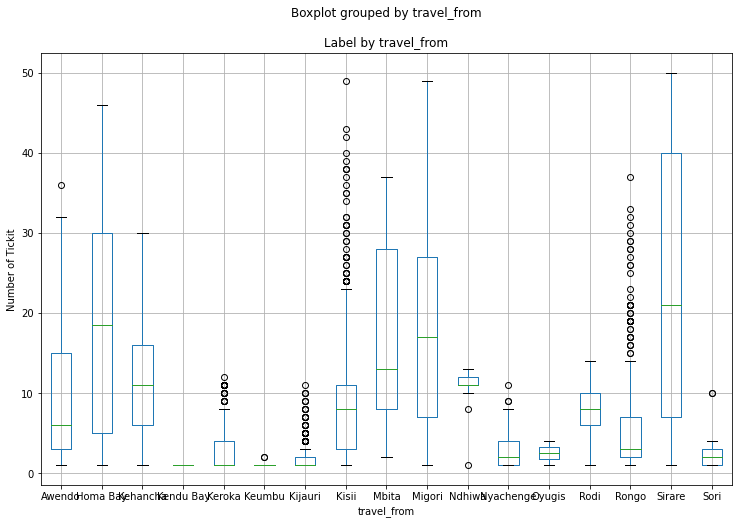

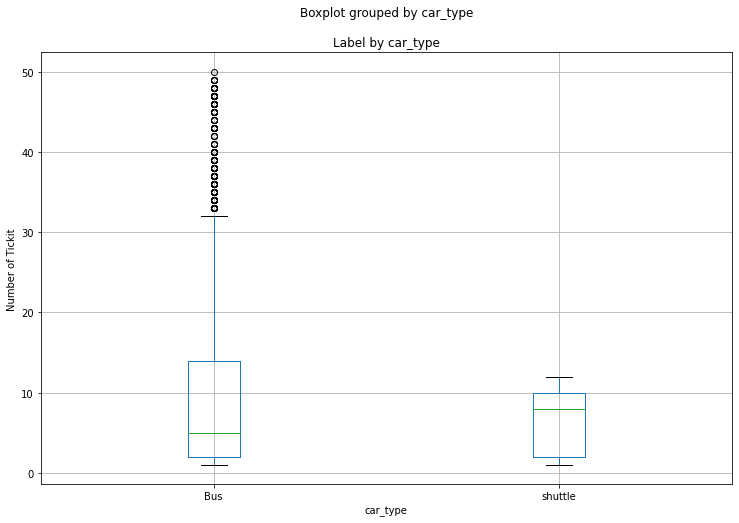

In [45]:
# plot a boxplot for the label by each categorical feature  

for col in categorical_features:
    fig = plt.figure(figsize=(12, 8))
    ax = fig.gca()
    df_new.boxplot(column = 'number_of_tickit', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Number of Tickit")
plt.show()

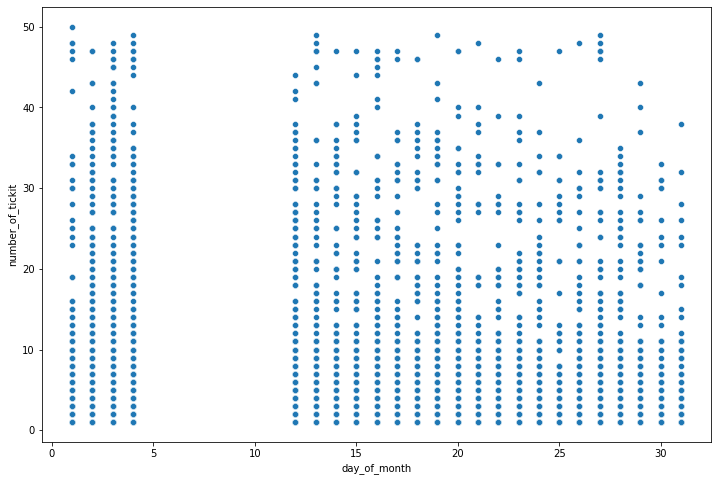

In [46]:
#scatter plot to understand day of month relation with number of tickets.
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_new['day_of_month'],y= df_new['number_of_tickit'])
plt.show()

# **Observation**

We can see that there is the gap between 5 to 11 in the day of the month. We can assume that there is official holyday of public transport between these days. we can also say that the number of tickets in all the days of month are almost same.

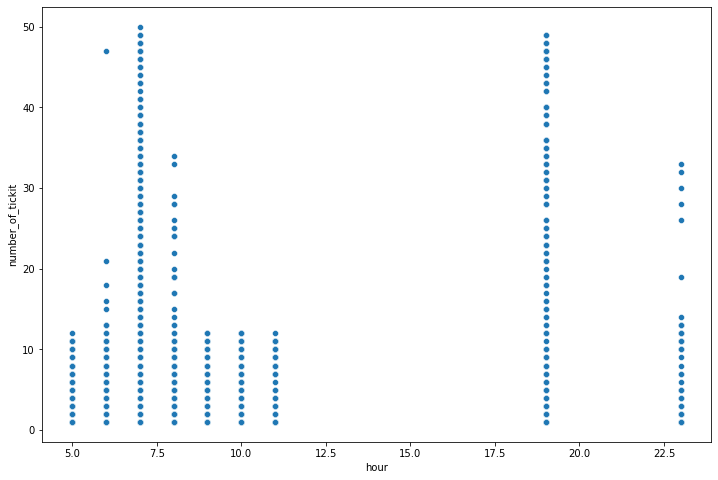

In [47]:
#scatter plot to understand hour relation with number of tickets.
plt.rcParams['figure.figsize']= (12,8)
sns.scatterplot(x=df_new['hour'],y= df_new['number_of_tickit'])
plt.show()

## **Observation:**

We can see that most of the ticktes were sold at 7 AM and 8 PM. And that seems true because in the morning most of the people go to the work and office.

From the above we can say that there is no ride between 12pm to 5.30Pm

## **Let's add distance and time taken column in our dataset using Google Maps**

In [48]:
#calculating distance between two points using google maps.
distance = {'Migori': 370 , 'Keroka': 280, 'Homa Bay':360, 'Kisii':305.1, 'Keumbu':295, 'Rongo':332,
'Kijauri':271, 'Oyugis':330.6, 'Awendo':351, 'Sirare':392, 'Nyachenge':326, 'Kehancha': 387.7,
'Kendu Bay':347, 'Sori':399, 'Rodi':348, 'Mbita':401, 'Ndhiwa': 371}
df_new["distance"]=df_new.travel_from.map(distance)

In [49]:
#calculating travel time between two points using google maps.
#  7*60 is converting hours into minutes.
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
df_new["time_taken"]=df_new.travel_from.map(time)

In [50]:
df_new.head(10)

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickit,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,distance,time_taken
0,1442,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10,370.0,428
1,5437,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11,370.0,428
2,5710,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11,280.0,300
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11,360.0,420
4,5778,27-11-17,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11,370.0,428
5,5781,27-11-17,7:09,Homa Bay,Bus,49,26,2017-11-27 07:09:00,0,331,27,201748,7,9,0,2017,4,11,360.0,420
6,5784,20-04-18,5:10,Kisii,shuttle,11,1,2018-04-20 05:10:00,4,110,20,201816,5,10,0,2018,2,4,305.1,334
7,5789,20-04-18,9:50,Kisii,shuttle,11,1,2018-04-20 09:50:00,4,110,20,201816,9,50,0,2018,2,4,305.1,334
8,5790,20-04-18,7:06,Kisii,Bus,49,2,2018-04-20 07:06:00,4,110,20,201816,7,6,0,2018,2,4,305.1,334
9,5791,20-04-18,6:00,Kisii,shuttle,11,1,2018-04-20 06:00:00,4,110,20,201816,6,0,0,2018,2,4,305.1,334


In [51]:
df["travel_time"] = df["travel_time"].str.split(':').apply(lambda x: int(x[0]) + (int(x[1])/60))

In [52]:
df_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickit,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,distance,time_taken
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10,370.0,428
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11,370.0,428
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11,280.0,300
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11,360.0,420
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11,370.0,428


lets see correlation of distance, time taken and number of tickets.

In [53]:
corr_columns = df_new[['distance','time_taken', 'number_of_tickit']]

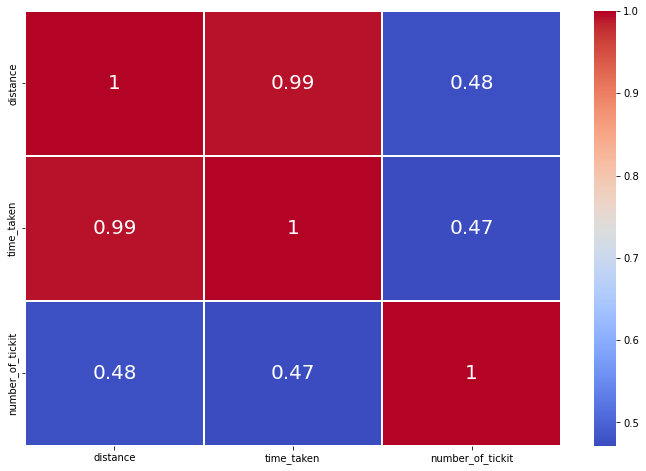

In [54]:
correlation = corr_columns.corr()
sns.heatmap(abs(correlation),annot=True,annot_kws={'size':20},cmap ='coolwarm',linewidth=1)
plt.show()

#corltn = np.triu(np.ones_like(corr_columns.corr()))
#corltn

#sns.heatmap(corr_columns.corr(),annot=True,mask=corltn)

We can see that distance and time_taken column have strong Multicollinearity with each other.
 so we have to do something about it.

we know that Speed = Distance/Time so we will use it and drop distance and time_taken.

In [55]:
# create speed column.
df_new['speed']= df_new['distance']/df_new['time_taken']

In [56]:
df_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickit,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,distance,time_taken,speed
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10,370.0,428,0.864486
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11,370.0,428,0.864486
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11,280.0,300,0.933333
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11,360.0,420,0.857143
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11,370.0,428,0.864486


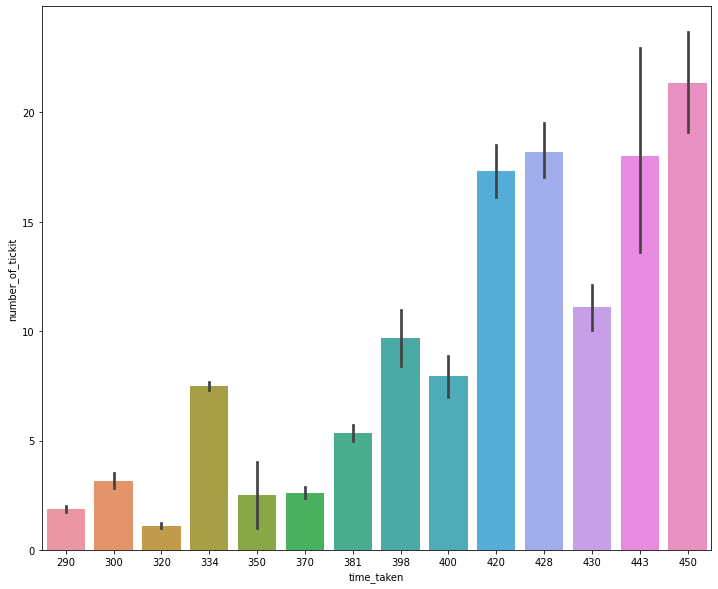

In [57]:
plt.rcParams['figure.figsize']= (12,10)
sns.barplot(x= 'time_taken',y= 'number_of_tickit', data= df_new)

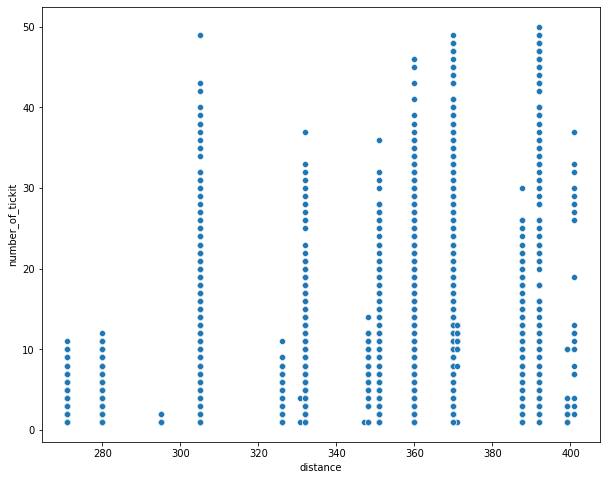

In [58]:
plt.rcParams['figure.figsize']= (10,8)
sns.scatterplot(x= 'distance',y= 'number_of_tickit', data= df_new)
plt.show()

In [59]:
num_col = df_new.describe().columns.values
num_col

array(['travel_time', 'number_of_tickit', 'day_of_week', 'day_of_year',
       'day_of_month', 'hour', 'minute', 'is_weekend', 'year', 'quarter',
       'month', 'distance', 'time_taken', 'speed'], dtype=object)

In [60]:
#categorical features
cat_col=df_new.describe(include="object").columns.values
cat_col

array(['ride_id', 'travel_date', 'travel_from', 'car_type',
       'max_capacity', 'year_woy'], dtype=object)

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(W):
  #Calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = W.columns
  vif["VIF"] = [variance_inflation_factor(W.values, i) for i in range(W.shape[1])]

  return(vif)

In [62]:
#check Variance Inflation Factor(VIF)
calc_vif(df_new[[i for i in num_col]])

,variables,VIF
0,travel_time,inf
1,number_of_tickit,2.710116e+00
2,day_of_week,8.329163e+00
3,day_of_year,7.182652e+04
4,day_of_month,5.197967e+02
5,hour,inf
6,minute,inf
7,is_weekend,3.526149e+00
8,year,1.517650e+05
9,quarter,1.172204e+02


In [63]:
calc_vif(df_new[[i for i in num_col if i not in ['minute']]])

,variables,VIF
0,travel_time,1055.479713
1,number_of_tickit,2.710116
2,day_of_week,8.329163
3,day_of_year,71826.515378
4,day_of_month,519.796678
5,hour,991.155378
6,is_weekend,3.526149
7,year,151765.044629
8,quarter,117.220393
9,month,81674.547308


In [64]:
calc_vif(df_new[[i for i in num_col if i not in ['minute','time_taken','year','quarter','day_of_year','distance','travel_time']]])

,variables,VIF
0,number_of_tickit,1.998585
1,day_of_week,8.284117
2,day_of_month,3.388359
3,hour,8.734042
4,is_weekend,3.490087
5,month,3.168326
6,speed,16.230527


In [65]:
#required independent features
req_features=calc_vif(df_new[[i for i in num_col if i not in ['minute','time_taken','year','quarter','day_of_year','distance','travel_time']]]).variables.values

In [66]:
#make a new dataframe with independent and dependent features.
#df_new=df_new[req_features]
#df_new['number_of_tickit']=df_new['number_of_tickit']

# **Encoding Categorical features**

In [67]:
# coverting categorical features into Numerical.
df_new = pd.get_dummies(df_new, columns=['travel_from','car_type'], drop_first=True)

In [68]:
df_new.head()

,ride_id,travel_date,travel_time,max_capacity,number_of_tickit,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,distance,time_taken,speed,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,car_type_shuttle
0,1442,17-10-17,7.250000,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10,370.0,428,0.864486,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,5437,19-11-17,7.200000,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11,370.0,428,0.864486,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,5710,26-11-17,7.083333,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11,280.0,300,0.933333,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5777,27-11-17,7.166667,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11,360.0,420,0.857143,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5778,27-11-17,7.200000,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11,370.0,428,0.864486,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [69]:
data = df_new.copy()
data.columns

Index(['ride_id', 'travel_date', 'travel_time', 'max_capacity',
       'number_of_tickit', 'date', 'day_of_week', 'day_of_year',
       'day_of_month', 'year_woy', 'hour', 'minute', 'is_weekend', 'year',
       'quarter', 'month', 'distance', 'time_taken', 'speed',
       'travel_from_Homa Bay', 'travel_from_Kehancha', 'travel_from_Kendu Bay',
       'travel_from_Keroka', 'travel_from_Keumbu', 'travel_from_Kijauri',
       'travel_from_Kisii', 'travel_from_Mbita', 'travel_from_Migori',
       'travel_from_Ndhiwa', 'travel_from_Nyachenge', 'travel_from_Oyugis',
       'travel_from_Rodi', 'travel_from_Rongo', 'travel_from_Sirare',
       'travel_from_Sori', 'car_type_shuttle'],
      dtype='object')

In [70]:
data.isnull().sum()

ride_id                  0
travel_date              0
travel_time              0
max_capacity             0
number_of_tickit         0
date                     0
day_of_week              0
day_of_year              0
day_of_month             0
year_woy                 0
hour                     0
minute                   0
is_weekend               0
year                     0
quarter                  0
month                    0
distance                 0
time_taken               0
speed                    0
travel_from_Homa Bay     0
travel_from_Kehancha     0
travel_from_Kendu Bay    0
travel_from_Keroka       0
travel_from_Keumbu       0
travel_from_Kijauri      0
travel_from_Kisii        0
travel_from_Mbita        0
travel_from_Migori       0
travel_from_Ndhiwa       0
travel_from_Nyachenge    0
travel_from_Oyugis       0
travel_from_Rodi         0
travel_from_Rongo        0
travel_from_Sirare       0
travel_from_Sori         0
car_type_shuttle         0
dtype: int64

In [71]:
unnecessary_cols = ['ride_id','travel_date', 'travel_time','distance','number_of_tickit','time_taken','year_woy','max_capacity','date']


# **Training the Models**

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import math

In [73]:
#independent and dependent features
from scipy.stats import zscore
X= data.drop(unnecessary_cols, axis='columns').apply(zscore)
Y= data['number_of_tickit']

In [74]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state=50)

# **Implimenting Linear Regression**

In [75]:
from sklearn.linear_model import LinearRegression

#Call the model
model = LinearRegression()

# fitting linear model
model.fit(X_train, y_train)


LinearRegression()

In [76]:
#prediction
y_pred_train = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [77]:
#r2 score and adjusted r2 score

r2_score_test = r2_score(y_test,y_test_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.41223989561241947
Adjusted r2_score : 0.4019014442648854


In [78]:
# Model score on Train and Test
train_model_lr = model.score(X_train,y_train)
print('Training Accuracy:',train_model_lr)

test_model_lr = model.score(X_test,y_test)
print('Testing Accuracy:',test_model_lr)

Training Accuracy: 0.3708373336548565
Testing Accuracy: 0.41223989561241947


In [79]:
#define a function which print the result of Evaluation metrics.
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [80]:
# Test dataset metrics
print_metrics(y_test, y_test_pred)

MSE is 44.284946429292454
RMSE is 6.654693563891012
RMSE is 0.41223989561241947
MAE is 4.568045352024742
MAPE is 151.90073822409312


We can see our model performence is not so good, Lets try some other models.

# **Implementing Lasso Regression** 

In [81]:
from sklearn.linear_model import Lasso


In [82]:
#lasso_data = data.copy()

In [83]:
#creating dependent and independent variable
#X = lasso_data.drop(unnecessary_cols, axis='columns')
#Y = lasso_data['number_of_tickit']

# train test split
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25 , random_state= 0 )

In [84]:
X_test.shape

(1563, 27)

In [85]:
#Model Fitting
lasso = Lasso(alpha=0.01 , max_iter= 1500 )
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=1500)

In [86]:
#Model Prediction
y_pred_train = lasso.predict(X_train)
y_test2_pred = lasso.predict(X_test)

In [87]:
#r2 score and adjusted r2 score
r2_score_test = r2_score(y_test,y_test2_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_test2_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.4133726712048619
Adjusted r2_score : 0.4030541449003219


In [88]:
# Model score on Train and Test
train_model_llr = model.score(X_train,y_train)
print('Training Accuracy:',train_model_llr)

test_model_llr = model.score(X_test,y_test)
print('Testing Accuracy:',test_model_llr)

Training Accuracy: 0.3708373336548565
Testing Accuracy: 0.41223989561241947


In [89]:
#Test dataset evaluation matrics
print_metrics(y_test, y_test2_pred)

MSE is 44.1995971412866
RMSE is 6.64827775753139
RMSE is 0.4133726712048619
MAE is 4.56491392296043
MAPE is 152.47724938177254


# **Cross Validation for Lasso Regression**

In [90]:

from sklearn.model_selection import GridSearchCV

In [91]:
### Cross validation and hyperparameter tuning
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,0.05,1,2,3,4,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 0.05, 1, 2, 3, 4, 5, 10,
                                   20, 30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [92]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.05}

Using  {'alpha': 0.05}  the negative mean squared error is:  -47.54931088938887


In [93]:
y_pred_lasso2 = lasso_regressor.predict(X_test)

In [94]:
print_metrics(y_test,y_pred_lasso2)

MSE is 44.33222736597334
RMSE is 6.658245066530169
RMSE is 0.411612372028904
MAE is 4.585588293179118
MAPE is 154.20392210532415


In [95]:
# Model score on Train and Test
train_model_lrh = model.score(X_train,y_train)
print('Training Accuracy:',train_model_lrh)

test_model_lrh = model.score(X_test,y_test)
print('Testing Accuracy:',test_model_lrh)

Training Accuracy: 0.3708373336548565
Testing Accuracy: 0.41223989561241947


In [96]:
r2_score_test = r2_score(y_test,y_pred_lasso2)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred_lasso2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)


r2_score: 0.411612372028904
Adjusted r2_score : 0.4012628828072625


# **Implementing Ridge Regression**

In [97]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

Let's take alpha = 1

In [98]:
#Model fitting
ridge = Ridge(alpha =1, max_iter= 1500)
ridge.fit(X_train, y_train)

Ridge(alpha=1, max_iter=1500)

In [99]:
#Model Prediction
y_pred_train = ridge.predict(X_train)
y_pred_ridge = ridge.predict(X_test)

In [100]:
 #Model score on Train and Test
train_model_rr = model.score(X_train,y_train)
print('Training Accuracy:',train_model_rr)

test_model_rr = model.score(X_test,y_test)
print('Testing Accuracy:',test_model_rr)

print_metrics(y_test, y_pred_ridge)

r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Training Accuracy: 0.3708373336548565
Testing Accuracy: 0.41223989561241947
MSE is 44.19194876606773
RMSE is 6.6477025178679385
RMSE is 0.41347418221886334
MAE is 4.561609751981098
MAPE is 152.05381603272525
R2 : 0.41347418221886334
Adjusted R2 :  0.4031574414500746


In [101]:
# Cross Validation and Hyperprarameter tuning
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,2,3,4,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 2, 3, 4, 5, 10, 20, 30, 40, 45, 50,
                                   55, 60, 100]},
             scoring='neg_mean_squared_error')

In [102]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -47.48732400049374


In [103]:
#Model Prediction
y_pred_ridge2 = ridge_regressor.predict(X_test)

In [104]:
print_metrics(y_test,y_pred_ridge2)

MSE is 44.28448953401563
RMSE is 6.654659235003369
RMSE is 0.4122459596327527
MAE is 4.5676370746321275
MAPE is 151.88294979831457


In [105]:
# Model score on Train and Test
train_model_rrh = model.score(X_train,y_train)
print('Training Accuracy:',train_model_rrh)

test_model_rrh = model.score(X_test,y_test)
print('Testing Accuracy:',test_model_rrh)

Training Accuracy: 0.3708373336548565
Testing Accuracy: 0.41223989561241947


In [106]:
r2 = r2_score(y_test, y_pred_ridge2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.4122459596327527
Adjusted R2 :  0.4019076149487685


# **Implementing Elastic net Regression**

In [107]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.5)

In [108]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.01)

In [109]:
#Model Score
elasticnet.score(X_train, y_train)

0.36964634387047

In [110]:
y_pred_en = elasticnet.predict(X_test)

In [111]:
# Model score on Train and Test
train_model_en = model.score(X_train,y_train)
print('Training Accuracy:',train_model_en)

test_model_en = model.score(X_test,y_test)
print('Testing Accuracy:',test_model_en)

Training Accuracy: 0.3708373336548565
Testing Accuracy: 0.41223989561241947


In [112]:
#Evaluation metrics
print_metrics(y_test,y_pred_en)

MSE is 44.2028430869844
RMSE is 6.648521872340077
RMSE is 0.4133295902589422
MAE is 4.565003625793942
MAPE is 152.50957072258936


In [113]:
#r2 score and adjusted r2 score
r2 = r2_score(y_test, y_pred_en)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.4133295902589422
Adjusted R2 :  0.4030103061788063


# **Grid Search Cross Validation for Elastic Net Regression**

In [114]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 10, 20, 30,
                                   40, 45, 50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [115]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [116]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.8}

Using  {'alpha': 0.01, 'l1_ratio': 0.8}  the negative mean squared error is:  -47.54359826494266


In [117]:
#Evaluation metrics
print_metrics(y_test,y_pred_elastic)

MSE is 44.201367726633784
RMSE is 6.648410917402277
RMSE is 0.4133491715845079
MAE is 4.56501648442222
MAPE is 152.50053701838786


In [118]:
#r2 score and adjusted r2 score
r2 = r2_score(y_test, y_pred_elastic)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.4133491715845079
Adjusted R2 :  0.4030302319315969


# **Decision Tree**

In [119]:
from sklearn.tree import DecisionTreeRegressor

In [120]:
decision_tree_data = data.copy()

In [121]:
decision_tree_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 6248
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ride_id                6249 non-null   object        
 1   travel_date            6249 non-null   object        
 2   travel_time            6249 non-null   float64       
 3   max_capacity           6249 non-null   object        
 4   number_of_tickit       6249 non-null   int64         
 5   date                   6249 non-null   datetime64[ns]
 6   day_of_week            6249 non-null   int64         
 7   day_of_year            6249 non-null   int64         
 8   day_of_month           6249 non-null   int64         
 9   year_woy               6249 non-null   object        
 10  hour                   6249 non-null   int64         
 11  minute                 6249 non-null   int64         
 12  is_weekend             6249 non-null   int64         
 13  yea

In [122]:
# multicollinearity does not affect Tree based model so we will include distance and time take.
unnecessary_cols = ['ride_id','travel_date', 'travel_time','number_of_tickit','date']


In [123]:
# creating dependent and independant variable.
X= decision_tree_data.drop(unnecessary_cols, axis='columns')
Y= decision_tree_data['number_of_tickit']

In [124]:
predictors = X

In [125]:
#train and test split
X_train , X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.3, random_state=0 )

In [126]:

# fitting decision tree model
tree_model = DecisionTreeRegressor(criterion='squared_error', max_leaf_nodes=30,max_depth= 30,random_state=0)
dtree =tree_model.fit(X_train, y_train)

In [127]:
y_dt_pred = tree_model.predict(X_test)

In [128]:
from sklearn.tree import export_graphviz
export_graphviz(tree_model, out_file='tree.dot', feature_names=X.columns)

In [129]:
#import libraries for the display of decision tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [130]:
pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=7e7085bf79824e4502a0899029c2a71b28de461f1a8f1de72fedae3417405c7e
  Stored in directory: /root/.cache/pip/wheels/05/7d/1b/8306781244e42ede119edbb053bdcda1c1f424ca226165a417
Successfully built torchviz


In [131]:
from torchviz import make_dot

In [132]:
#display of decision tree
#graph = Source(tree.export_graphviz(tree_model, out_file ='tree.dot',
              # feature_names =X.columns.values))
#display(SVG(graph.pipe(format='svg')))

In [133]:
# Model score on Train and Test
train_model_dt = tree_model.score(X_train,y_train)
print('Training Accuracy:',train_model_dt)

test_model_dt = tree_model.score(X_test,y_test)
print('Testing Accuracy:',test_model_dt)

Training Accuracy: 0.5879395837909727
Testing Accuracy: 0.5558271116850865


In [134]:
r2_score_test = r2_score(y_test,y_dt_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_dt_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.5558271116850865
Adjusted r2_score : 0.5483559453596593


In [135]:
print_metrics(y_test,y_dt_pred)

MSE is 33.53602116726233
RMSE is 5.791029370264178
RMSE is 0.5558271116850865
MAE is 3.974281403026389
MAPE is 138.0580992841833


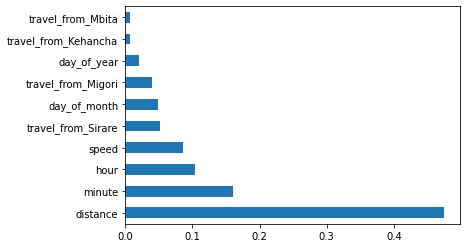

In [136]:
##
%matplotlib inline
feature_importances = pd.Series(tree_model.feature_importances_,index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

We can see we are not getting good score so far, Lets try Ensemble methods

# **Random Forest Regressor**

In [137]:
from sklearn.ensemble import RandomForestRegressor

In [138]:
random_forest_data = data.copy()

# multicollinearity does not affect Tree based model so we will include distance and time taken
unnecessary_cols = ['ride_id','travel_date', 'travel_time','number_of_tickit','date']

In [139]:
X = random_forest_data.drop(unnecessary_cols, axis='columns')
Y= random_forest_data['number_of_tickit']

In [140]:
#train and test split
X_train , X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.3, random_state=0 )

In [141]:
random_reg = RandomForestRegressor()

In [142]:
random_reg.fit(X_train,y_train)

RandomForestRegressor()

In [143]:
y_pred_rf = random_reg.predict(X_test)

In [145]:
# Model score on Train and Test
train_model_rf = random_reg.score(X_train,y_train)
print('Training Accuracy:',train_model_rf)

test_model_rf = random_reg.score(X_test,y_test)
print('Testing Accuracy:',test_model_rf)

Training Accuracy: 0.949117396968589
Testing Accuracy: 0.6569936575900114


In [146]:
r2_score_test = r2_score(y_test,y_pred_rf)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.6569936575900114
Adjusted r2_score : 0.6512241531870219


In [147]:
print_metrics(y_test,y_pred_rf)

MSE is 25.897726453333334
RMSE is 5.088980885534287
RMSE is 0.6569936575900114
MAE is 3.2293066666666665
MAPE is 104.5372645984227


Our model seem to overfit since it does much better on the training set than on the test set i.e training accuracy(=94.8%) is much laarger than testing accuracy(=65.4%), let's do hyperparameter tuning using GridSearchCV, RandomSearchCV.

## **Random forest Regressor using GridSearchCV, RandomSearchCV**

In [148]:
from sklearn.model_selection import RandomizedSearchCV

In [149]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = [ 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['squared_error','absolute_error','poisson']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['squared_error', 'absolute_error', 'poisson']}


In [150]:
estimator = RandomForestRegressor()
random = RandomizedSearchCV( estimator=estimator, param_distributions=random_grid, n_iter=3, cv=2, verbose=1,
                               random_state=0 )


In [151]:
random.fit(X_train,y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=3,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=1)

In [152]:
random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_features': 'log2',
 'max_depth': 670,
 'criterion': 'squared_error'}

Now lets use GridSearchCV on this best parameters.

In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
random_grid ={'criterion': ['squared_error'],
 'max_depth':[655,660,670],
 'max_features': ['log2'],
 'min_samples_leaf':[6],
 'min_samples_split': [5],
 'n_estimators': [550,650,600]}

In [155]:
estimator = RandomForestRegressor()
grid = GridSearchCV( estimator=estimator, param_grid =random_grid, cv=2, verbose=1
                               ,n_jobs=-1 )

In [156]:
grid.fit(X,Y)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [655, 660, 670], 'max_features': ['log2'],
                         'min_samples_leaf': [6], 'min_samples_split': [5],
                         'n_estimators': [550, 650, 600]},
             verbose=1)

In [157]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 655,
 'max_features': 'log2',
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'n_estimators': 650}

In [158]:
y_pred_gc = grid.predict(X_test)

In [160]:
# Model score on Train and Test
train_model_gc = grid.score(X_train,y_train)
print('Training Accuracy:',train_model_gc)

test_model_gc = grid.score(X_test,y_test)
print('Testing Accuracy:',test_model_gc)

Training Accuracy: 0.6344062002795267
Testing Accuracy: 0.6539569356345314


In [161]:
r2_score_test = r2_score(y_test,y_pred_gc)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred_gc))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.6539569356345314
Adjusted r2_score : 0.6481363523489483


In [162]:
print_metrics(y_test,y_pred_gc)

MSE is 26.127005579676286
RMSE is 5.111458263517006
RMSE is 0.6539569356345314
MAE is 3.4264756955957156
MAPE is 116.22783210347359


# **XGboost**

In [197]:
import xgboost as xgb

In [198]:
# multicollinearity does not affect Tree based model so we will include distance and time taken
notrqrd_cols = ['ride_id','travel_date','year_woy','max_capacity','travel_time','number_of_tickit','date']

In [199]:
xgboost_data = data.copy()

In [206]:
X = xgboost_data.drop(notrqrd_cols, axis=1)
Y = xgboost_data['number_of_tickit']

#train and test split
X_train , X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.3, random_state=0 )


In [207]:
xgb_reg = xgb.XGBRegressor(
                        booster= 'gbtree',
                        eta= 0.004,
                        learning_rate= 0.1,
                        max_depth= 7,
                        min_child_weight= 10,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        scale_pos_weight= 1,
                        verbosity= 1)

xgb_reg.fit(X_train,y_train)

[18:39:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eta=0.004, max_depth=7, min_child_weight=10)

In [208]:
y_pred_xgb = xgb_reg.predict(X_test)

In [210]:
# Model score on Train and Test
train_model_xgb = xgb_reg.score(X_train,y_train)
print('Training Accuracy:',train_model_xgb)

test_model_xgb = xgb_reg.score(X_test,y_test)
print('Testing Accuracy:',test_model_xgb)

Training Accuracy: 0.7873357050424359
Testing Accuracy: 0.6391966937361462


In [211]:
r2_score_test = r2_score(y_test,y_pred_xgb)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.6391966937361462
Adjusted r2_score : 0.6335255306566601


In [213]:
print_metrics(y_test,y_pred_xgb)

MSE is 27.241436013771594
RMSE is 5.219332908885157
RMSE is 0.6391966937361462
MAE is 3.418948305384318
MAPE is 113.14909046122543


Our XGboost model seem to over fit lets GridSearchCV to try multiple Parameters.

# XGboost using GridSearchCV

In [214]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [215]:
xgb = xgb.XGBRegressor()

In [216]:
params = {"min_child_weight":[9,10,11], 
          'eta': [0.05,0.06,0.07],
          'eval_metric':['rmse'], 
          'colsample_bytree':[0.6],
          'max_depth': [8,9,10],
          }

In [217]:
xgb_grid = GridSearchCV(xgb,param_grid=params, verbose=1,cv=5)
xgb_grid.fit(X, Y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[18:44:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:11] WARNING: /workspace/src/objective/regr

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.6], 'eta': [0.05, 0.06, 0.07],
                         'eval_metric': ['rmse'], 'max_depth': [8, 9, 10],
                         'min_child_weight': [9, 10, 11]},
             verbose=1)

In [218]:
xgb_grid.best_params_

{'colsample_bytree': 0.6,
 'eta': 0.05,
 'eval_metric': 'rmse',
 'max_depth': 8,
 'min_child_weight': 9}

In [ ]:
xgb_grid.best_estimator_.get_params()

In [ ]:
y_pred_gxgb = xgb_grid.predict(X_test)

In [ ]:
# Model score on Train and Test
train_model_gxgb = xgb_grid.score(X_train,y_train)
print('Training Accuracy:',train_model)

test_model_gxgb = xgb_grid.score(X_test,y_test)
print('Testing Accuracy:',test_model)

In [ ]:
r2_score_test = r2_score(y_test,y_pred_gxgb)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred_gxgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

In [ ]:
# Test dataset Matrics
print_metrics(y_test,y_pred_gxgb)

## **Important Features**

In [ ]:
# arry of important features
importance = xgb_grid.best_estimator_.feature_importances_
importance

In [ ]:
# plotting important features using Xgboost in built function.
plt.figure(figsize=(12,10))
sorted_idx = xgb_grid.best_estimator_.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx],importance[sorted_idx])
plt.xlabel('Xgboost Feature Importance')

We can see the list of most important features in our data in above barplot.

# **Evaluating all models**

**Lets create dataframe containing the details of all models.**

In [ ]:
#evaluation metrics for all models
Model = ["Linear Regression","Lasso Regression","Ridge Regression","Decision Tree",'Random Forest','Xgboost']
Train_Accuracy=  [train_model_lr,train_model_lrh, train_model_rrh,train_model_dt, train_model_rfh, train_model_gxgb]
Test_Accuracy = [test_model_lr,test_model_lrh, test_model_rrh,test_model_dt, test_model_rfh, test_model_gxgh]

In [ ]:
#creating dataframe for all classifiers using dictionary
pd.DataFrame({"Model":Model,"Train Accuracy":Train_Accuracy,'Test Accuracy': Test_Accuracy,
'r2_score':[0.408231,0.407777,0.407028,0.5601,0.661703,0.803554],
'Adjusted r2_score':[0.398601,0.398601,0.398601,0.398601,0.398601,0.398601],
'MSE':[51.632482,51.672078,51.737407,33.213404,25.542140,14.832057],
'RMSE':[7.185574,7.188329,7.192872,5.763107,5.053923,3.851241],
'MAE':[4.866946,4.872014,4.876217,3.972016,3.419740,2.593606],
'MAPE':[148.235086,148.608494,148.834105,137.695529,120.302272,84.909633]})

# **Observations:**

1)We can see from above table that Xgboost highest Training and Test Accuracy.

2)Xgboost also have best r2 and Adjusted r2 score.

3)It also have minimum MSE,RMSE,MAE and MAPE errors.

4)From above observations we can say that Xgboost is the best Model.

# **CONCLUSIONS**

**1)** **As we have implemented six different models to predict the number of seats that Mobiticket can expect to sell for each ride. Linear Regression, Regularized linear regression (Ridge and Lasso), Decision Tree, Random Forest Regressor and Xgboost Regressor. Xgboost regression model performed the best among them**. 

**2)** **Our Model will help Mobiticket and Bus operators to anticipate the number of tickets they can expect to sell for each ride**.
